In [35]:
import json as json
import datetime
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import openweathermapy.core as owm
from citipy import citipy

In [36]:
lat = []
lon =[]
for x in range(50):
    lat.append(random.uniform(90, -90))
    lon.append(random.uniform(-180, 180))


In [37]:
cities = []
for i in range(50):
    cities.append(citipy.nearest_city(lat[i], lon[i]))


In [38]:
api_key = "5a36ca4a2a1cf794acb87b23d945ef66"

In [54]:
settings = {"units": "imperial", "appid": api_key}

temp =[]
lat =[]
lon = []
clouds = []
speed= []
temp = []
humidity = []
cl = []
new_city=[]
for city in cities:
        
    try:
        name=city.city_name
        citydata = owm.get_current(name, **settings)
        cl.append(citydata)
        new_city.append(name)
        temp.append(citydata["main"]["temp_max"])
        humidity.append(citydata["main"]["humidity"])
        speed.append(citydata["wind"]["speed"])
        clouds.append(citydata["clouds"]["all"])
        lat.append(citydata["coord"]["lat"])
        lon.append(citydata["coord"]["lon"])
    
    except:
        print("Error with city data. Skipping")         

#Print the json (pretty printed)
print(json.dumps(cl, indent=4, sort_keys=True))

Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
Error with city data. Skipping
[
    {
        "base": "stations",
        "clouds": {
            "all": 0
        },
        "cod": 200,
        "coord": {
            "lat": 23.43,
            "lon": 72.66
        },
        "dt": 1522717200,
        "id": 1263623,
        "main": {
            "humidity": 33,
            "pressure": 1009,
            "temp": 77,
            "temp_max": 77,
            "temp_min": 77
        },
        "name": "Mansa",
        "sys": {
            "country": "IN",
            "id": 7758,
            "message": 0.1643,
            "sunrise": 1522717198,
            "sunset": 1522761942,
            "type": 1
        },
        "visibility": 3000,
        "weather": [
         

In [55]:
weath_table = pd.DataFrame({"Temperature": temp,
                           "Humidity": humidity,
                           "Wind Speed": speed,
                           "Max Temperature (F)": temp,
                           "Cloudiness": clouds,
                           "Latitudes": lat,
                           "Longitudes": lon,
                           "City": new_city
                           })
weath_table

,City,Cloudiness,Humidity,Latitudes,Longitudes,Max Temperature (F),Temperature,Wind Speed
0,mansa,0,33,23.43,72.66,77.00,77.00,3.36
1,donskoye,40,81,45.45,41.98,42.80,42.80,22.37
2,coelho neto,36,99,-4.25,-43.02,73.31,73.31,1.59
3,longyearbyen,20,60,78.22,15.63,10.40,10.40,18.34
4,saint-philippe,1,51,45.36,-73.48,35.60,35.60,6.93
5,cherskiy,0,76,68.75,161.30,31.95,31.95,7.29
6,hobart,75,40,-42.88,147.33,69.80,69.80,17.22
7,rikitea,32,100,-23.12,-134.97,78.35,78.35,4.94
8,samarai,64,100,-10.62,150.67,82.76,82.76,6.73
9,constitucion,5,8,23.99,-104.67,78.80,78.80,14.99


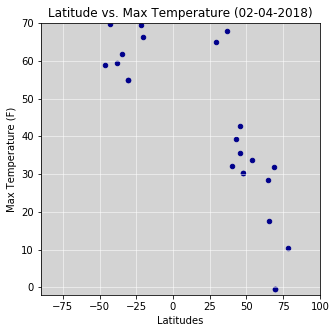

In [56]:
weath_table.plot(kind='Scatter',x='Latitudes',y='Max Temperature (F)',linewidths=1,c='darkblue',grid=True,
          legend=None,figsize=(5,5),title='Latitude vs. Max Temperature ('+datetime.datetime.today().strftime('%d-%m-%Y')+')')
plt.rcParams['axes.facecolor']='lightgrey'
plt.grid(linewidth=0.5,color='white')
plt.ylim(-2,70)
plt.xlim(-90,100)


plt.show()

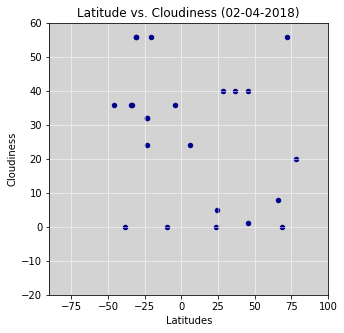

In [57]:
weath_table.plot(kind='Scatter',x='Latitudes',y='Cloudiness',linewidths=1,c='darkblue',grid=True,
          legend=None,figsize=(5,5),title='Latitude vs. Cloudiness ('+datetime.datetime.today().strftime('%d-%m-%Y')+')')
plt.rcParams['axes.facecolor']='lightgrey'
plt.grid(linewidth=0.5,color='white')
plt.ylim(-20,60)
plt.xlim(-90,100)


plt.show()

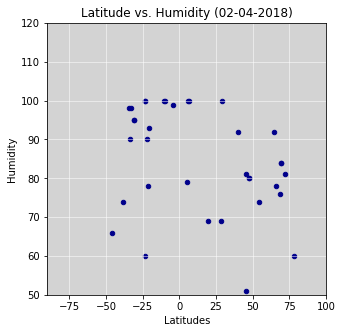

In [58]:
weath_table.plot(kind='Scatter',x='Latitudes',y='Humidity',linewidths=1,c='darkblue',grid=True,
          legend=None,figsize=(5,5),title='Latitude vs. Humidity ('+datetime.datetime.today().strftime('%d-%m-%Y')+')')
plt.rcParams['axes.facecolor']='lightgrey'
plt.grid(linewidth=0.5,color='white')
plt.ylim(50, 120)
plt.xlim(-90,100)


plt.show()

In [59]:
weath_table.to_csv("weather.csv", index=False, header=True)       